# Atelier 6

## Introduction

Au cours de cet atelier, nous explorerons le moyen de lire un fichier contenant des données, pour les manipuler et les visualiser.

D'une manière plus détaillée, cet atelier permettra d'aborder les notions suivantes :

- Lecture & écriture de fichiers
- Utilisation de boucles et fonctions pour manipuler et préparer des données
- Bases de la visualisation de données

## Ressources

Les fichiers qui se trouvent au coeur de cet atelier sont des fichiers CSV (Comma Separated Values) qu'on peut trouver dans le dépôt GitHub des Ateliers HyPhD : https://github.com/HackYourPhd/ateliers-open-geek/tree/master/Atelier%236

Ces fichiers compilent le résultat d'études détaillées ci-dessous :

- ms212.csv : Pulse Rates before and after Exercise - http://www.statsci.org/data/oz/ms212.html
- cholestg.csv : Cholesterol Levels after Heart Attack : http://www.statsci.org/data/general/cholest.html
- discover.csv : Discours et conceptions sur l'ouverture de la science : ...

Ces fichier de données CSV sont des fichiers comportant du texte, formaté (organisé) de telle manière à représenter un "tableau". Sur la première ligne, on y retrouve donc les entêtes des colonnes, entre `"` et séparées par des `,`. Chaque ligne suivante correspond à une entrée de données (un individu, une réponse, une prise de mesure ...), chaque valeur (correspondant aux entêtes) se trouvant entre `"` et séparées par des `,`.

## Mise en pratique

### Initialisation de l'environnement IPython

```
# Activer l'environnement Anaconda 
$ condactivate
# Aller dans le dossier où l'on souhaite travailler
$ cd ateliers-open-geek/
# Lancer IPython dans ce dossier
$ ipython notebook --notebook-dir=.
```

### Lecture du fichier

Basiquement, pour lire un fichier, on ouvre ce fichier avec la commande `open`, puis on le parcours de haut en bas, ligne par ligne ou caractère par caractère.

Par exemple, lançons Python et ouvrons le fichier `ms212.csv` et affichons les 3 premières lignes :

In [4]:
# Le bloc "with open" ouvre le fichier, puis le ferme automatiquement quand on sort de ce bloc
# Le paramètre "r" passé à open indique qu'on souhaite "lire" ("r" pour "read") ce fichier, et non le modifier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On créé un compteur pour compter le nombre de ligne qu'on a parcouru
    lines_read = 0
    # On parcours le fichier ligne par ligne
    for line in datafile:
        # On affiche la ligne avec print
        print(line)
        # On augmente le compteur de 1
        lines_read += 1
        # Et si ce compteur dépasse 3, on arrête la lecture
        if lines_read >= 3:
            break

"Height","Weight","Age","Gender","Smokes","Alcohol","Exercise","Ran","Pulse1","Pulse2","Year"

"173","57","18","2","2","1","2","2","86","88","93"

"179","58","19","2","2","1","2","1","82","150","93"



On observe bien la première ligne, contenant les entêtes, puis les lignes suivantes, contenant les données.
Si l'on veut manipuler ces données, il va falloir maintenant décomposer ces lignes, pour les stocker dans des variables, que nous pourrons par la suite manipuler ou plotter.

On appelle l'étape de "décomposition" d'un fichier en variables manipulables le `parsing`.

### Parsing d'un fichier

In [5]:
# On prépare des variables dans lesquelles on va stocker les valeurs du fichier :
heights = []
weights = []

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On parcours le fichier ligne par ligne, en utilisant enumerate pour compter la ligne, en même temps
    for line_number, line in enumerate(datafile):
        if line_number == 0:
            # Si la ligne est la première, on l'ignore et on passe au tour de boucle suivante
            # On ne va traiter que les données
            continue
        # On découpe la ligne en ses différents éléments
        values = line.split(",")
        # On ajoute la première valeur aux tailles
        heights.append(values[0])
        # On ajoute la deuxième valeur aux poids
        weights.append(values[1])
        # etc ...

# On vérifie qu'on a bien fait le boulot en affichant les 3 premières tailles :
print(heights[0:3])

['"173"', '"179"', '"167"']


Bien ... mais pas top : ça reste des chaînes de caractère et non des nombres, qui en plus contiennent des `"` qui ne nous servent à rien.

In [6]:
# On prépare des variables dans lesquelles on va stocker les valeurs du fichier :
heights = []
weights = []

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On parcours le fichier ligne par ligne, en utilisant enumerate pour compter la ligne, en même temps
    for line_number, line in enumerate(datafile):
        if line_number == 0:
            # Si la ligne est la première, on l'ignore et on passe au tour de boucle suivante
            # On ne va traiter que les données
            continue
        # On découpe la ligne en ses différents éléments
        values = line.split(",")
        # On récupère la première valeur : une taille, et on la convertit en nombre
        height = values[0]
        # On enlève les guillemets inutiles aux extrémités
        height = height.strip('"')
        # On convertit cette taille en nombre
        height = float(height)
        # Et on l'ajoute aux tailles
        heights.append(height)
        
        # On recommence pour le poids
        weight = values[1]
        weight = weight.strip('"')
        weight = float(weight)
        weights.append(weight)
        # etc ...

# On vérifie qu'on a bien fait le boulot en affichant les 3 premières tailles :
print(heights[0:3])

[173.0, 179.0, 167.0]


C'est mieux ! Mais ... c'est pénible, non ?
Heureusement, pour de nombreuses tâches, simples ou moins simples, des "bibliothèques" existent, comprenant des fonctions qui font ce genre de choses à votre place.

### La bibliothèque CSV

Pour le cas des fichiers CSV, il y a donc le module standard de Python : `csv`

In [7]:
# On importe ce module pour pouvoir l'utiliser
import csv

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On construit un lecteur de CSV, paramétré pour notre fichier
    csv_reader = csv.reader(datafile, delimiter=',', quotechar='"')
    for line in csv_reader:
        # Puis on le parcours ligne à ligne, comme un fichier
        print(line)
        if csv_reader.line_num >= 3:
            # Le reader contient une variable pour suivre la ligne à laquelle on se trouve ! Pratique ;)
            break

['Height', 'Weight', 'Age', 'Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran', 'Pulse1', 'Pulse2', 'Year']
['173', '57', '18', '2', '2', '1', '2', '2', '86', '88', '93']
['179', '58', '19', '2', '2', '1', '2', '1', '82', '150', '93']


On constate que, contrairement à plus haut, les lignes sont ici directement des tableaux Python contenant les valeurs.
C'est toujours une étape de gagnée !

Mais on peut faire mieux !

In [8]:
import csv

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On construit un lecteur de CSV, paramétré pour notre fichier
    csv_reader = csv.DictReader(datafile, delimiter=',', quotechar='"')
    for line in csv_reader:
        # Puis on le parcours ligne à ligne, comme un fichier
        print(line)
        if csv_reader.line_num >= 3:
            # Le reader contient une variable pour suivre la ligne à laquelle on se trouve ! Pratique ;)
            break

{'Pulse1': '86', 'Weight': '57', 'Year': '93', 'Height': '173', 'Smokes': '2', 'Exercise': '2', 'Pulse2': '88', 'Age': '18', 'Ran': '2', 'Gender': '2', 'Alcohol': '1'}
{'Pulse1': '82', 'Weight': '58', 'Year': '93', 'Height': '179', 'Smokes': '2', 'Exercise': '2', 'Pulse2': '150', 'Age': '19', 'Ran': '1', 'Gender': '2', 'Alcohol': '1'}


Cette fois, on obtient non plus des tableaux, mais des dictionnaires, contenant les données toute bien `parsée` et facilitant la manipulation !
Ce qui nous facilite la vie, par exemple, si l'on souhaite afficher les âges :

In [9]:
import csv

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On construit un lecteur de CSV, paramétré pour notre fichier
    csv_reader = csv.DictReader(datafile, delimiter=',', quotechar='"')
    for line in csv_reader:
        # Puis on le parcours ligne à ligne, comme un fichier
        print(line['Age'])
        if csv_reader.line_num >= 5:
            break

18
19
18
18


Il ne nous reste donc plus qu'à stocker ces dictionnaires au fur et à mesure de la lecture pour les manipuler plus tard.

In [10]:
import csv

data = []

# Lecture du fichier
with open("Atelier_6/ms212.csv", "r") as datafile:
    # On construit un lecteur de CSV, paramétré pour notre fichier
    csv_reader = csv.DictReader(datafile, delimiter=',', quotechar='"')
    for line in csv_reader:
        # Puis on le parcours ligne à ligne, comme un fichier
        data.append(line)

On a donc bien maintenant les données dans une variable `data`. Par exemple, l'age de la première ligne :

In [11]:
print(data[0]['Age'])

18


### Nettoyage des données

Si on a désormais un ensemble de données pratiques à manipuler, le type des données est encore toujours une chaîne de caractère, et même parfois un nombre à la place d'un "booléen" (une valeur vrai/faux).
On va donc repasser sur les différentes données pour mes transformer comme il nous arrange.

In [12]:
for entry in data:
    # La hauteur et le poids sont des nombres décimaux
    entry['Height'] = float(entry['Height'])
    entry['Weight'] = float(entry['Weight'])
    # Les valeurs de poul sont des nombres entier
    entry['Pulse1'] = int(entry['Pulse1'])
    entry['Pulse2'] = int(entry['Pulse2'])

ValueError: invalid literal for int() with base 10: 'NA'

Oups ! Il semblerait que certaines valeurs de pouls ne soient pas renseignées, et contiennent "NA" à la place d'un nombre. Il va être nécessaire de les gérer !

Pour se simplifier la vie, on va créer une fonction qui fait cette conversion en gèrant le "NA". On pourra alors l'utiliser pour Pulse1 et Pulse2.

In [13]:
def update_entry_to_int(entry, key):
    """ This function convert entry[key] to an int, replacing by None the "NA" values """
    value = entry[key]
    if value == "NA":
        value = None
    else:
        value = int(value)
    entry[key] = value

In [14]:
for entry in data:
    # La hauteur et le poids sont des nombres décimaux
    entry['Height'] = float(entry['Height'])
    entry['Weight'] = float(entry['Weight'])
    # Les valeurs de poul sont des nombres entier
    update_entry_to_int(entry, 'Pulse1')
    update_entry_to_int(entry, 'Pulse2')

Procédons également avec une fonction pour convertir les valeurs booléennes sur l'alcool et la cigarette.

In [15]:
def update_entry_to_bool(entry, key):
    """ This function convert entry[key] to a boolean. 1 is converted to True, 2 is converted to False."""
    value = entry[key]
    if value == "1":
        value = True
    elif value == "2":
        value = False
    else:
        # Si on a une valeur différente de 1 ou 2, comme un NA par exemple
        value = None
    entry[key] = value

In [16]:
for entry in data:
    update_entry_to_bool(entry, 'Smokes')
    update_entry_to_bool(entry, 'Alcohol')

### Enrichissement des données

Avec le poids et la taille, on peut calculer l'IMC (BMI) ! Let's go !

BMI = Weight / Height^2

Avec le poids en kg et la taille en m.

In [17]:
for entry in data:
    bmi = entry['Weight'] / ((entry['Height']/100)**2)
    entry['BMI'] = bmi

On pourrait même définir la classification associée à chaque valeur de BMI, telle que l'a défini la World Health Organization.

- Very severely underweight : 0 to 15.0
- Severely underweight : 15 to 16
- Underweight : 16 to 18.5
- Normal (healthy weight) : 18.5 to 25
- Overweight : 25 to 30
- Obese Class I (Moderately obese) : 30 to 35
- Obese Class II (Severely obese) : 35 to 40
- Obese Class III (Very severely obese) : 40 to 100

### Écriture d'un fichier CSV

Cette classification pourrait être mise sous la forme d'un fichier CSV, pour faciliter sa manipulation. Procédons !

In [18]:
bmi_classification = [
    {
        "class_id": 0,
        "label": "Very severely underweight",
        "min": 0.0,
        "max": 15.0
    },
    {
        "class_id": 1,
        "label": "Severely underweight",
        "min": 15.0,
        "max": 16.0
    },
    {
        "class_id": 2,
        "label": "Underweight",
        "min": 16.0,
        "max": 18.5
    },
    {
        "class_id": 3,
        "label": "Normal (healthy weight)",
        "min": 18.5,
        "max": 25.0
    },
    {
        "class_id": 4,
        "label": "Overweight",
        "min": 25.0,
        "max": 30.0
    },
    {
        "class_id": 5,
        "label": "Obese Class I (Moderately obese)",
        "min": 30.0,
        "max": 35.0
    },
    {
        "class_id": 6,
        "label": "Obese Class II (Severely obese)",
        "min": 35.0,
        "max": 40.0
    },
    {
        "class_id": 7,
        "label": "Obese Class III (Very severely obese)",
        "min": 40.0,
        "max": 100.0
    }
]

In [19]:
with open('Atelier_6/bmi_classification.csv', 'w') as bmi_file:
    # Utilisons les clés de la première classe comme liste de nos entêtes
    headers = bmi_classification[0].keys()
    # Préparons un "writer" CSV
    writer = csv.DictWriter(bmi_file, fieldnames=headers, delimiter=',', quotechar='"')
    writer.writeheader()
    for elt in bmi_classification:
        writer.writerow(elt)

On peut observer le fichier ainsi créé pour regarder ce qu'il est advenu. Pour la suite, on utilisera directement la variable bmi_classification, pour gagner du temps, mais on aurait également pu importer le fichier CSV créé pour recalculer cette variable.

Utilisons donc ces valeurs pour rajouter aux données cette classification.

In [20]:
def get_bmi_classification(value):
    """ This method return a tupple giving the class_id and the label associated to given BMI value """
    for elt in bmi_classification:
        if elt['min'] <= value < elt['max']:
            return elt['class_id'], elt['label']
    else:
        # Si aucune classe ne correspond
        return None, None

In [21]:
for entry in data:
    class_id, label = get_bmi_classification(entry['BMI'])
    entry['BMI_class'] = class_id

### Faire des graphiques

Maintenant qu'on a plein de données sous la main, mettons les en graphiques !
Pour cela, nous allons utiliser MatPlotLib, qui est intégré à IPython.

In [22]:
# Pour initialiser l'environnement matplotlib dans IPython Notebook :
%matplotlib inline

In [23]:
# Pour ensuite importer matplotlib :
import matplotlib.pyplot as plt

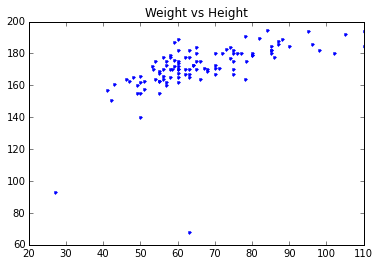

In [31]:
# Créons maintenant les objets que l'on veut afficher, par exemple exprimer le poids en fonction de la taille des individus
x = [entry['Weight'] for entry in data]
y = [entry['Height'] for entry in data]
# Puis créons le graphique !
plt.plot(x, y, '.')
plt.title('Weight vs Height')

Mieux encore, ajoutons une troisième dimension, on colorant les points selon la classe de BMI !

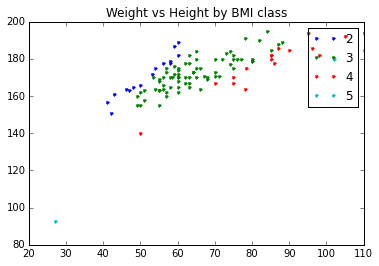

In [38]:
fig = plt.figure()
for bmi_class in range(0, 8):
    label = None
    x = []
    y = []
    # Pour chaque classe de BMI
    for entry in data:
        # On parcours toutes les données
        if not entry['BMI_class'] == bmi_class:
            # Si cette donnée ne correspond pas à la classe en cours, on l'ignore
            continue
        # Si elle correspond, on l'ajoute dans les tableaux  X & y correspondant à notre classe de BMI
        x.append(entry['Weight'])
        y.append(entry['Height'])
    # Puis on affiche cette classe s'il y a eu des données !
    if len(x) > 0:
        plt.plot(x, y, '.', label=bmi_class)

plt.title('Weight vs Height by BMI class');
plt.legend()
plt.show()